##NOISE REDUCTION

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as col
import matplotlib.image as mpimg
from scipy import signal
from scipy import ndimage

def rgb2gray(rgb_image):
    return np.dot(rgb_image[...,:3], [0.301, 0.678, 0.134])

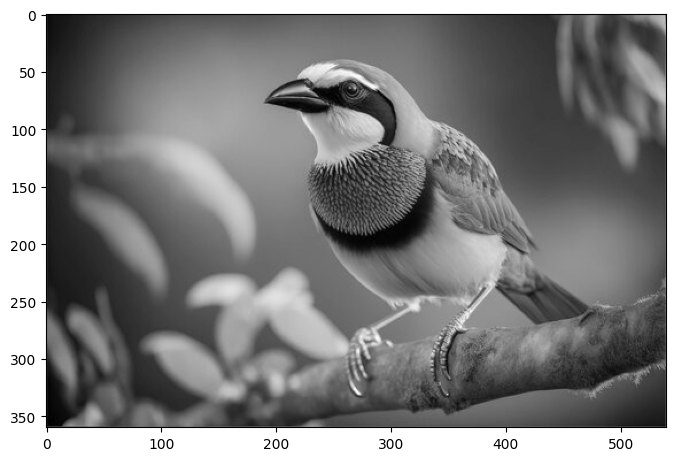

In [51]:
#IMAGE LOADING

image = mpimg.imread("/content/BIRD.jpeg")
image_gr = rgb2gray( image )

figureSize = (8,6)
plt.figure("Original Image", figsize=figureSize)
plt.imshow(image_gr)
plt.set_cmap("gray")

Adding Noise to the Image

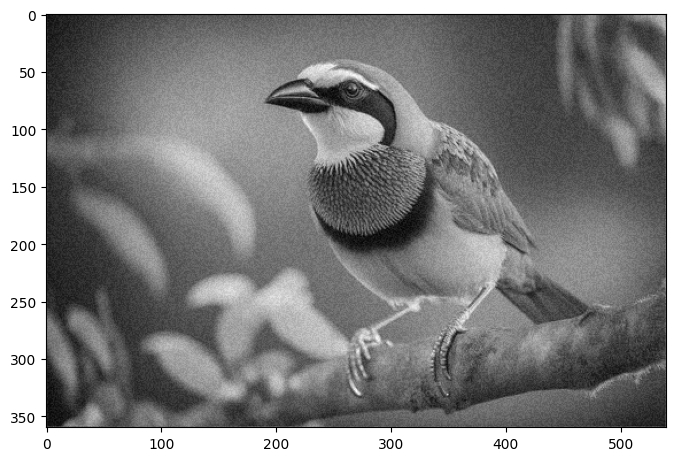

In [50]:
#Changing weight will change the noise in the image

weight = 0.75
noisy = image_gr + weight * image_gr.std() * np.random.random(image_gr.shape)
plt.figure("Noisy Image", figsize=figureSize)
plt.imshow(noisy)

#Average filter

In [36]:
def box_filter( w ): # w is the width of the average filter.
    return np.ones((w,w)) / (w*w)

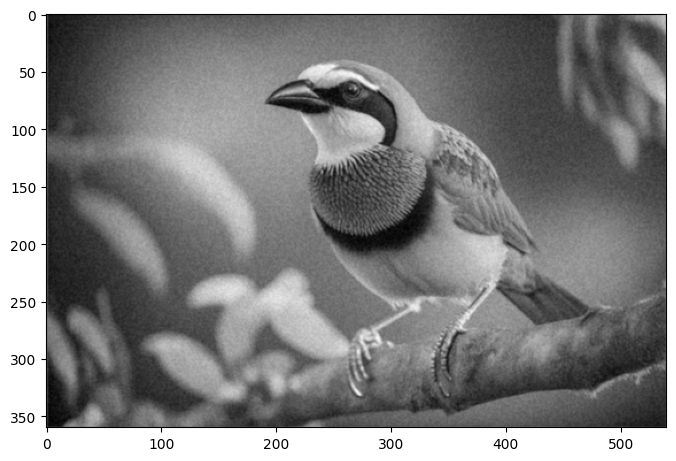

In [37]:
filtered_img_box2 = signal.convolve2d(noisy, box_filter( 2 ) ,'same')
plt.figure("2",figsize=figureSize)
plt.imshow(filtered_img_box2)

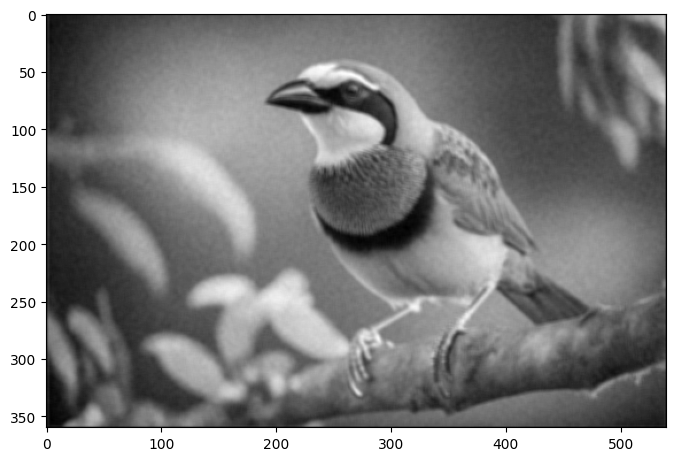

In [38]:
filtered_img_box4 = signal.convolve2d(noisy, box_filter( 4 ) ,'same')
plt.figure("4",figsize=figureSize)
plt.imshow(filtered_img_box4)

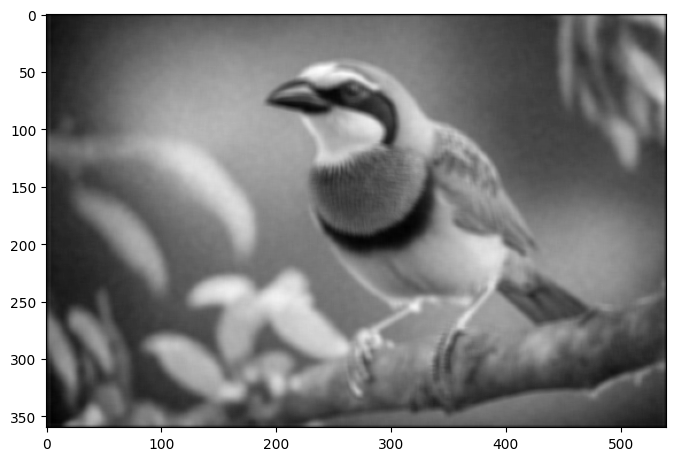

In [39]:
filtered_img_box6 = signal.convolve2d(noisy, box_filter( 6 ) ,'same')
plt.figure("6",figsize=figureSize)
plt.imshow(filtered_img_box6)

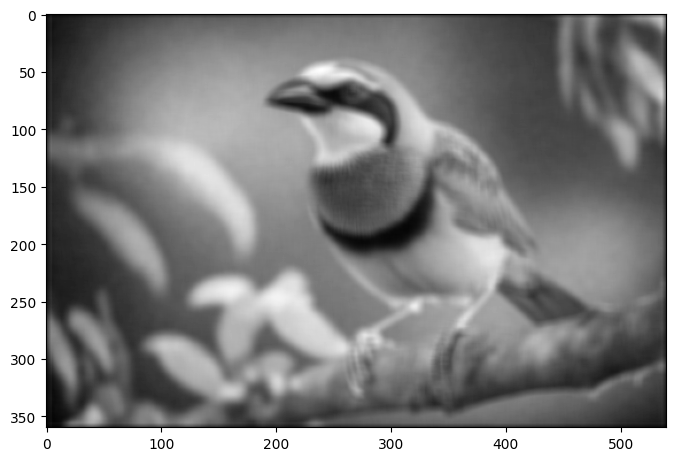

In [40]:
filtered_img_box8 = signal.convolve2d(noisy, box_filter( 8 ) ,'same')
plt.figure("8",figsize=figureSize)
plt.imshow(filtered_img_box8)

In [41]:
print(box_filter(4)) #Here, printing the box_filter for weight 4 which is being perfomed on the image for denoising.

[[0.0625 0.0625 0.0625 0.0625]
 [0.0625 0.0625 0.0625 0.0625]
 [0.0625 0.0625 0.0625 0.0625]
 [0.0625 0.0625 0.0625 0.0625]]


#Gaussian Filter

<ipython-input-42-2a879e63b1f4>:6: DeprecationWarning: Importing gaussian from 'scipy.signal' is deprecated and will raise an error in SciPy 1.13.0. Please use 'scipy.signal.windows.gaussian' or the convenience function 'scipy.signal.get_window' instead.
  gkern1d = signal.gaussian(kernlen, std=std).reshape(kernlen, 1)


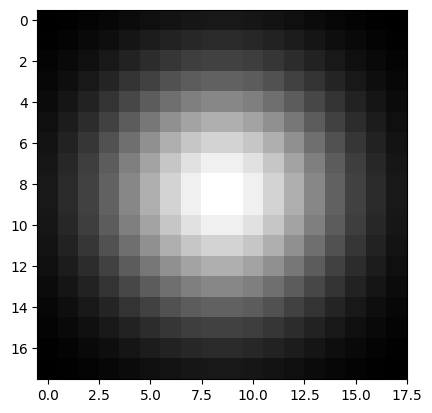

In [42]:
import numpy as np
from scipy import signal

def gaussian_kernel( kernlen , std ):
    #Returns a 2D Gaussian kernel array.
    gkern1d = signal.gaussian(kernlen, std=std).reshape(kernlen, 1)
    gkern2d = np.outer(gkern1d, gkern1d)
    return gkern2d

plt.imshow(gaussian_kernel(18,4), interpolation='none')

<ipython-input-42-2a879e63b1f4>:6: DeprecationWarning: Importing gaussian from 'scipy.signal' is deprecated and will raise an error in SciPy 1.13.0. Please use 'scipy.signal.windows.gaussian' or the convenience function 'scipy.signal.get_window' instead.
  gkern1d = signal.gaussian(kernlen, std=std).reshape(kernlen, 1)


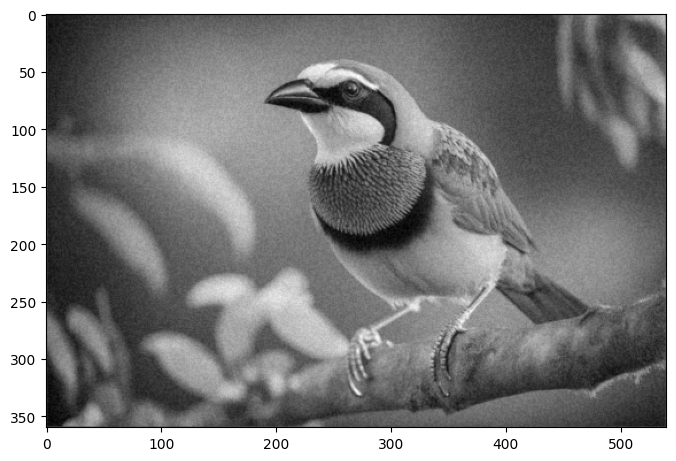

In [43]:
filtered_img_g7_std05 = signal.convolve2d(noisy, gaussian_kernel(7,0.5) ,'same')

plt.figure("2",figsize=figureSize)
plt.imshow(filtered_img_g7_std05)

<ipython-input-42-2a879e63b1f4>:6: DeprecationWarning: Importing gaussian from 'scipy.signal' is deprecated and will raise an error in SciPy 1.13.0. Please use 'scipy.signal.windows.gaussian' or the convenience function 'scipy.signal.get_window' instead.
  gkern1d = signal.gaussian(kernlen, std=std).reshape(kernlen, 1)


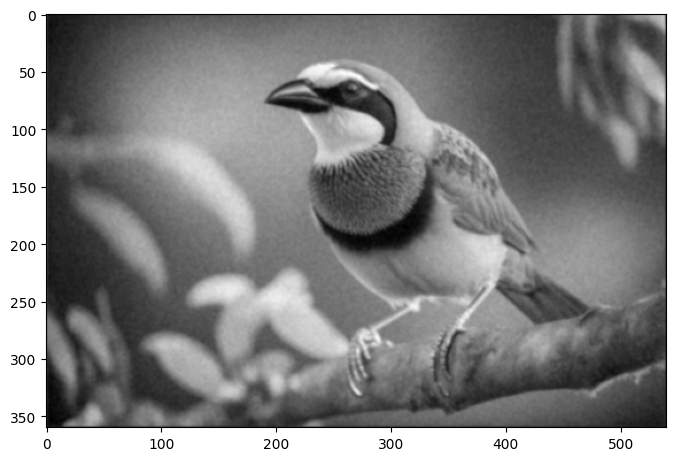

In [44]:
filtered_img_g7_std10 = signal.convolve2d(noisy, gaussian_kernel(7,1.0) ,'same')

plt.figure("4",figsize=figureSize)
plt.imshow(filtered_img_g7_std10)

<ipython-input-42-2a879e63b1f4>:6: DeprecationWarning: Importing gaussian from 'scipy.signal' is deprecated and will raise an error in SciPy 1.13.0. Please use 'scipy.signal.windows.gaussian' or the convenience function 'scipy.signal.get_window' instead.
  gkern1d = signal.gaussian(kernlen, std=std).reshape(kernlen, 1)


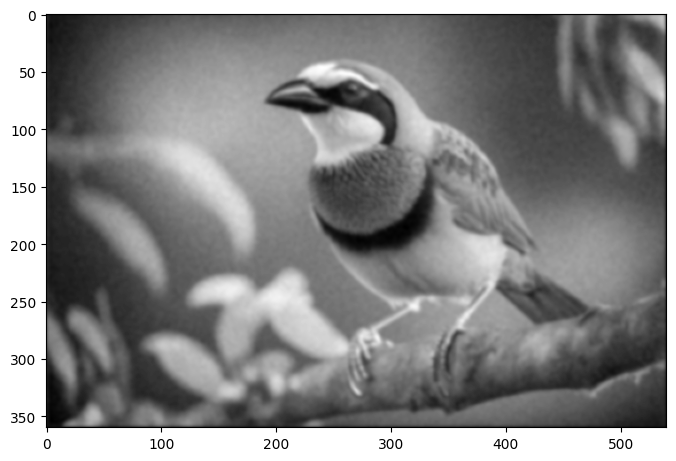

In [45]:
filtered_img_g7_std15 = signal.convolve2d(noisy, gaussian_kernel(7,1.5) ,'same')

plt.figure("6",figsize=figureSize)
plt.imshow(filtered_img_g7_std15)

<ipython-input-42-2a879e63b1f4>:6: DeprecationWarning: Importing gaussian from 'scipy.signal' is deprecated and will raise an error in SciPy 1.13.0. Please use 'scipy.signal.windows.gaussian' or the convenience function 'scipy.signal.get_window' instead.
  gkern1d = signal.gaussian(kernlen, std=std).reshape(kernlen, 1)


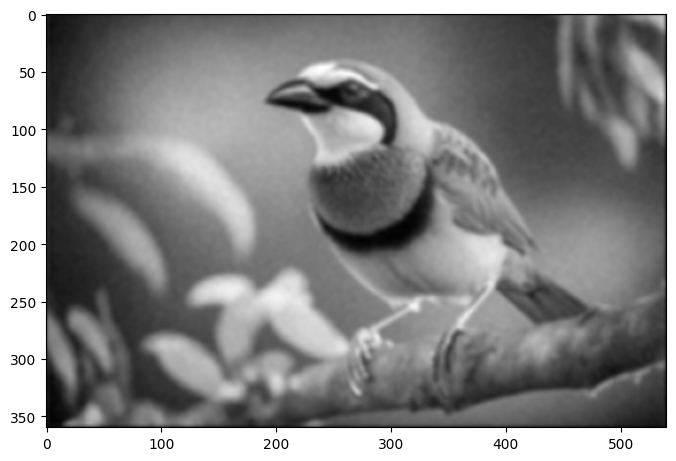

In [46]:
filtered_img_g7_std20 = signal.convolve2d(noisy, gaussian_kernel(7,2.0) ,'same')

plt.figure("8",figsize=figureSize)
plt.imshow(filtered_img_g7_std20)

#Median filter

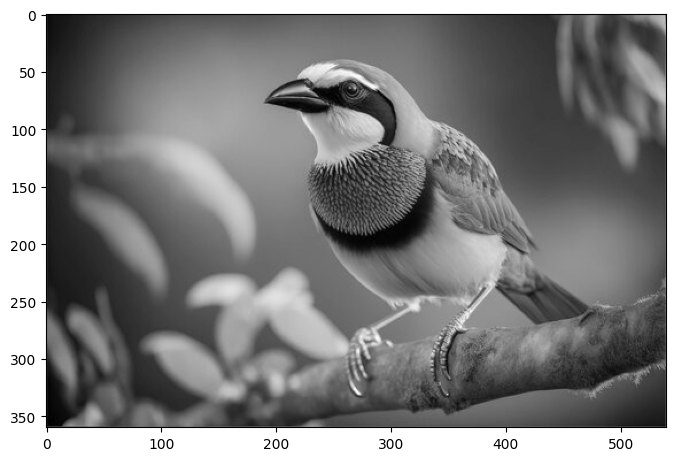

In [52]:
def salt_n_pepper(img):
    salt_pepper = np.random.random(img.shape) * 240  #s is the parameter that identify the size of the mask

    pepper = salt_pepper < 30;
    salt = salt_pepper > 240;

    img[pepper] = 0
    img[salt] = 240

    return img

plt.figure("Original image", figsize=figureSize)
plt.imshow(image_gr)



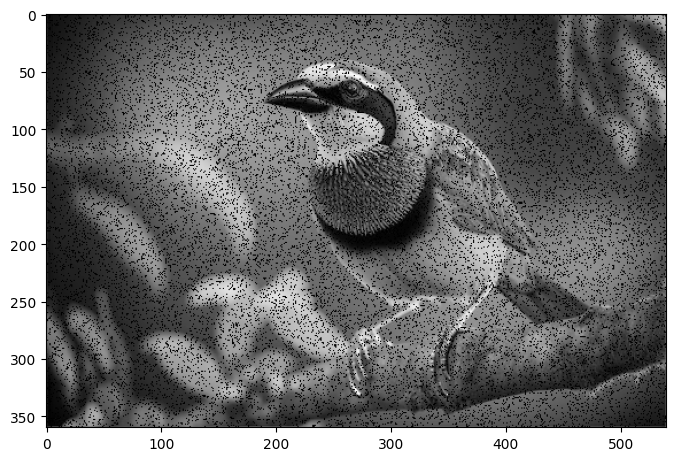

In [53]:
image_noisy_salt_pepper = salt_n_pepper( image_gr )
plt.figure("Salt and pepper", figsize=figureSize)
plt.imshow( image_noisy_salt_pepper )

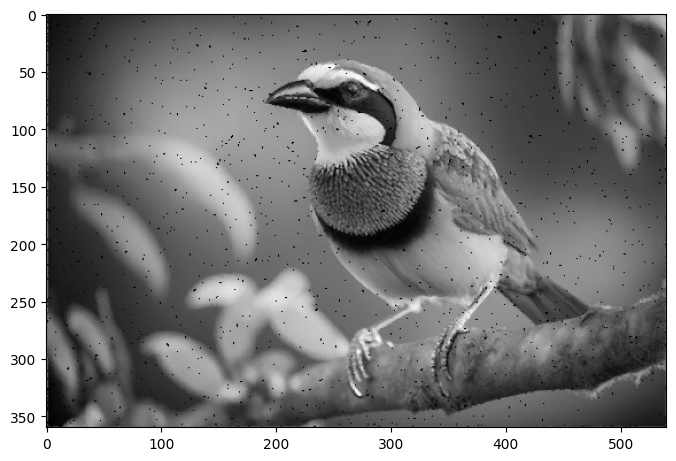

In [54]:
med_image2 = ndimage.median_filter(image_noisy_salt_pepper,(2,2))
plt.figure("Median Filter 2x2", figsize=figureSize)
plt.imshow(med_image2)

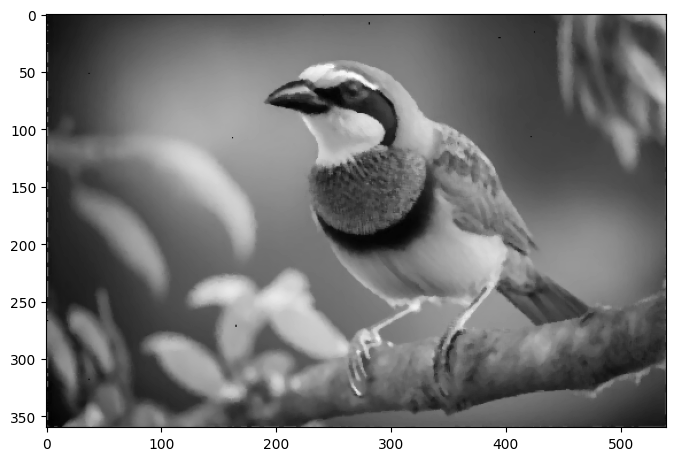

In [56]:
med_image4 = ndimage.median_filter(image_noisy_salt_pepper,(4,4))
plt.figure("Median Filter 4x4", figsize=figureSize)
plt.imshow(med_image4)

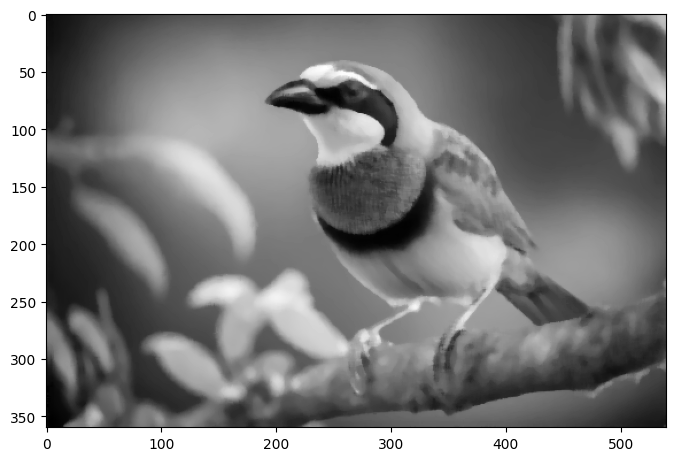

In [57]:
med_image6 = ndimage.median_filter(image_noisy_salt_pepper,(6,6))
plt.figure("Median Filter 6x6", figsize=figureSize)
plt.imshow(med_image6)